The aim of this exercise is to scrape the bus listing data available at PayTM website.

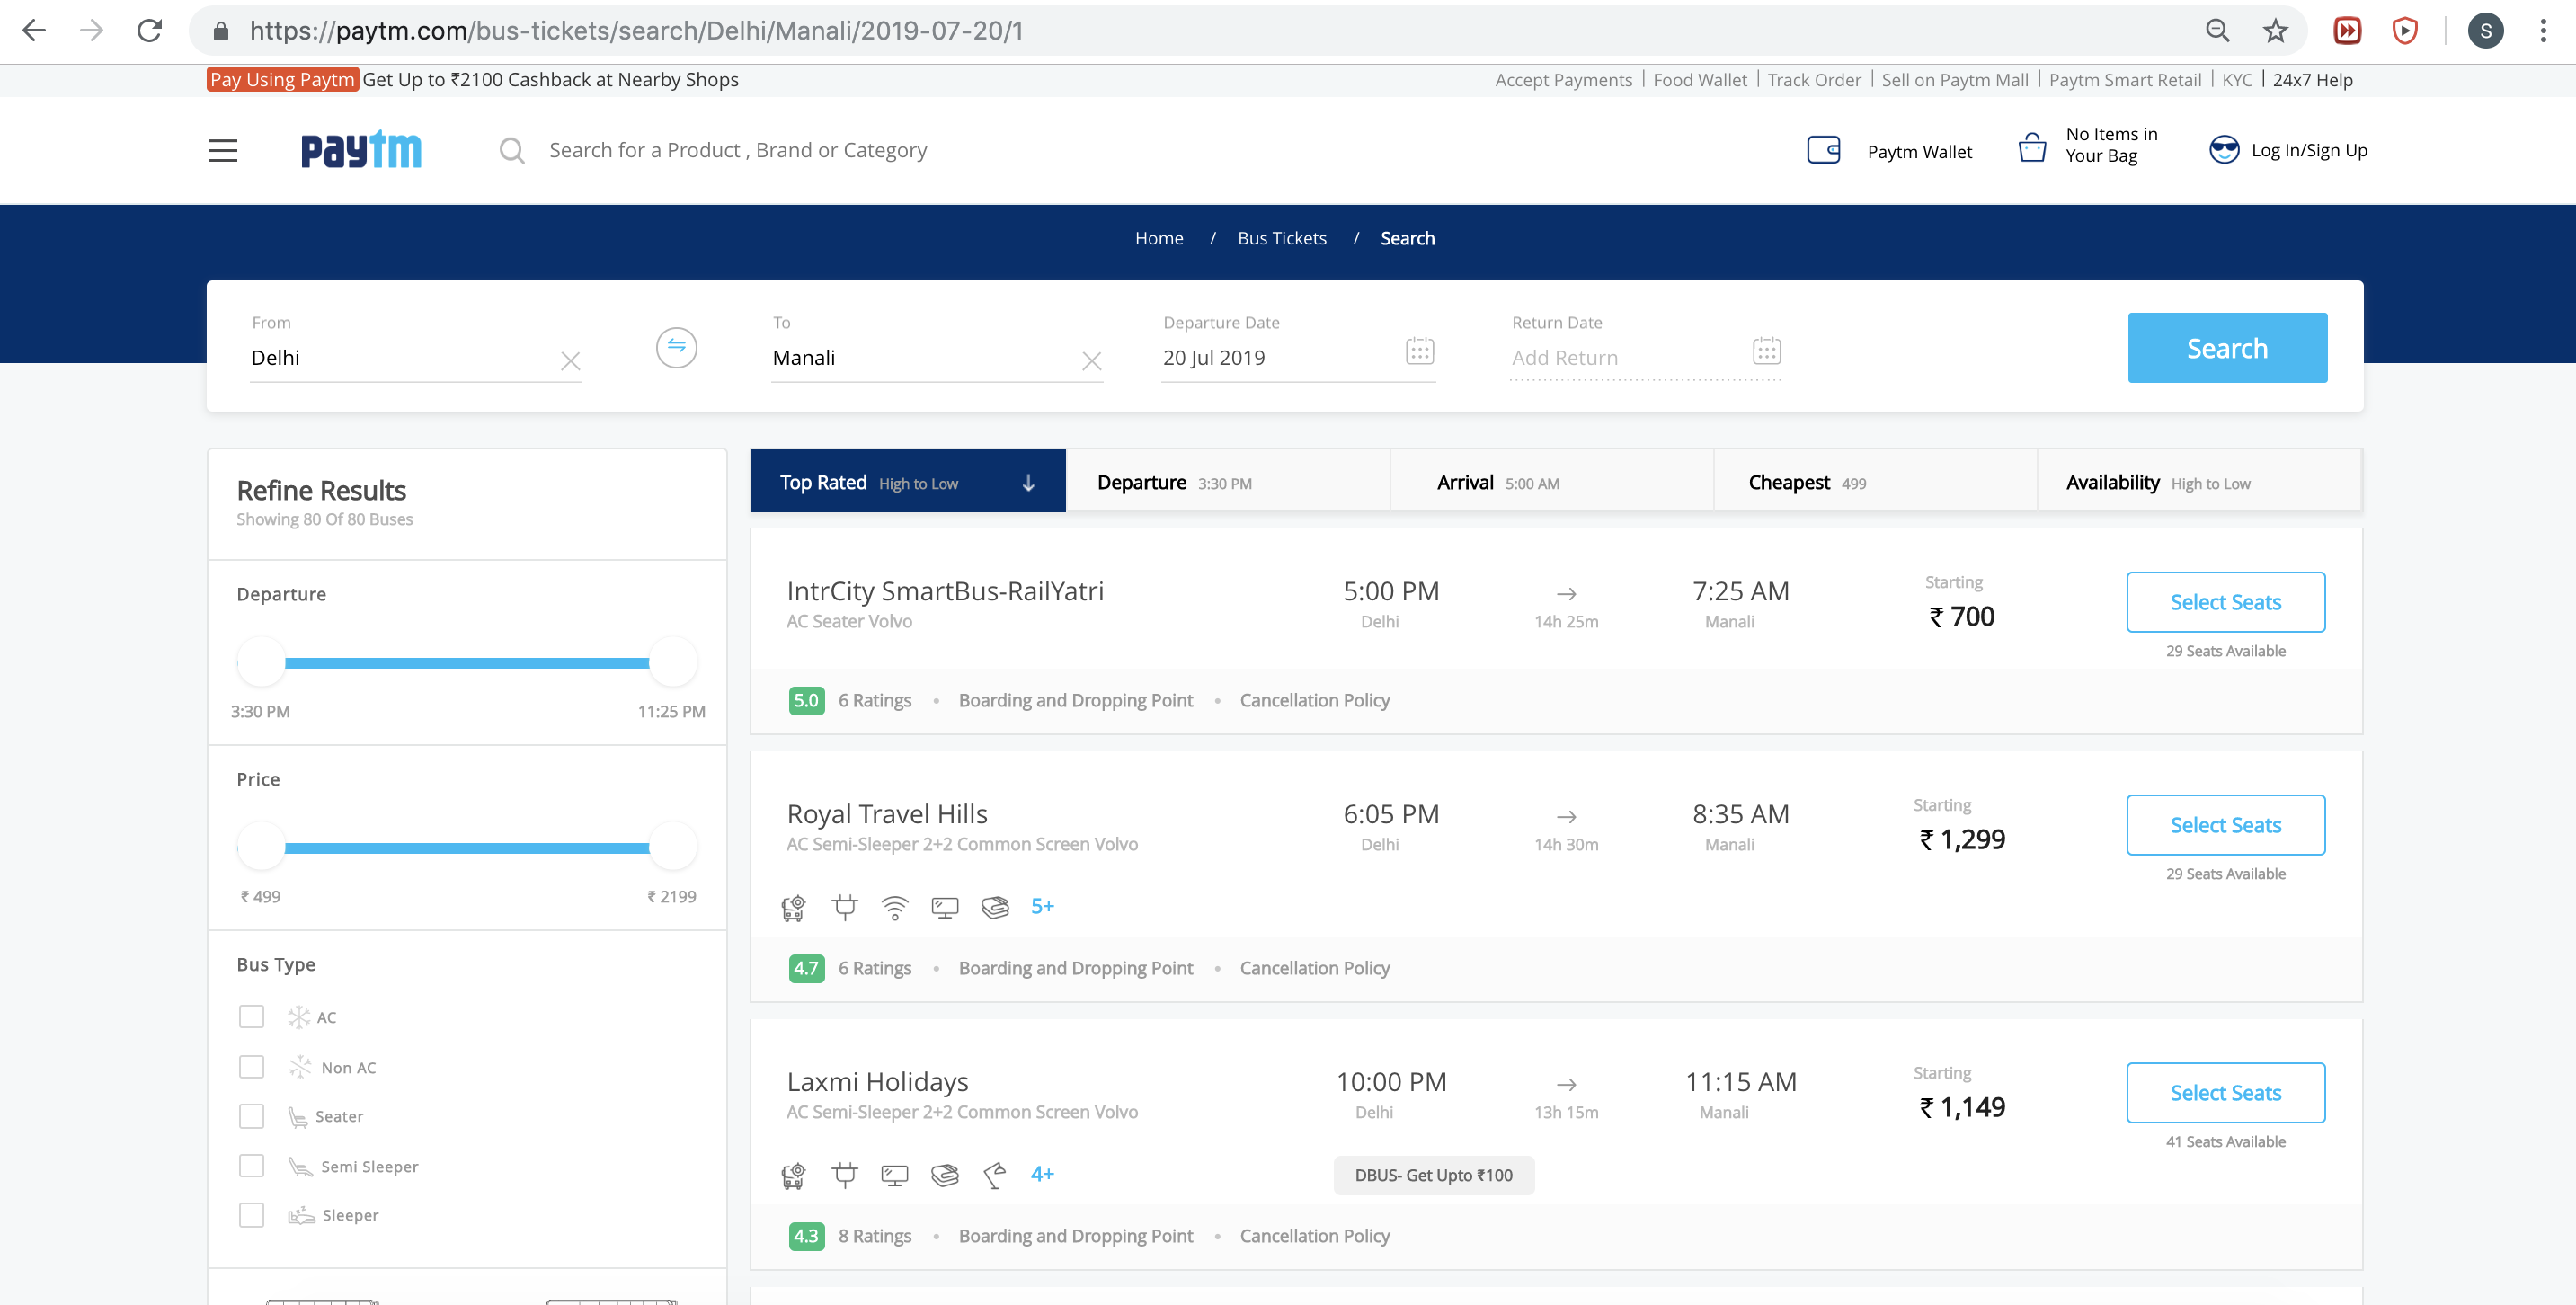

In [43]:
#View of the page that we are trying to scrape
from IPython.display import Image
Image(filename='PayTM_Bus_Listing.png') 

### Summary
#### Route: Delhi - Manali
#### Date: July 20, 2019
#### Total Buses: 80

It is possible that bus count may differ, as the bus operators keep adding new buses or a new operator will open it's booking. 

In [44]:
###cURL re-written in python for data copy
import requests

headers = {
    'Referer': 'https://paytm.com/bus-tickets/search/Delhi/Manali/2019-07-20/1',
    'Origin': 'https://paytm.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.109 Safari/537.36',
    'content-type': 'application/json',
}

params = (
    ('client', 'web'),
)

data = '{"date":"2019-07-20","dest_display_name":"Manali","src_display_name":"Delhi","is_last_minute_booking":true,"sold":true,"departed":true,"sort_by":[{"field":"popular","order":"desc"}]}'

journey = requests.post('https://travel.paytm.com/bus/v2/search', headers=headers, params=params, data=data)

#NB. Original query string below. It seems impossible to parse and
#reproduce query strings 100% accurately so the one below is given
#in case the reproduced version is not "correct".
# response = requests.post('https://travel.paytm.com/bus/v2/search?client=web', headers=headers, data=data)

In [45]:
#Checking response
journey

<Response [200]>

Response 200 means that connection is successfully established. 

In [46]:
#Data wrangling
temp=journey.json()
data=temp.get('body')

In [47]:
#Checking data type and length of raw data
data_type=type(data)
data_len=len(data)
data_type, data_len

(list, 80)

In [48]:
#Sample data after wrangling process
data[1]

{'incl_taxes': False,
 'boardingLocations': [{'providerLocationId': '31460',
   'locationName': 'kashmere gate',
   'locationAddress': None,
   'landmark': None,
   'dateTime': '2019-07-20T12:35:00.000Z',
   'display_name': 'Kashmere gate',
   'lat': 28.664515,
   'lng': 77.231335,
   'paytm_boarding_point_id': 455,
   'contact_number': None,
   'time': '1805',
   'boardingDate': '2019-07-20',
   'reportingTime': '1750',
   'status': 'ALLOWED'},
  {'providerLocationId': '58622',
   'locationName': 'Vidhan Sabha',
   'locationAddress': None,
   'landmark': None,
   'dateTime': '2019-07-20T13:05:00.000Z',
   'display_name': 'Vidhan sabha',
   'lat': None,
   'lng': None,
   'paytm_boarding_point_id': None,
   'contact_number': None,
   'time': '1835',
   'boardingDate': '2019-07-20',
   'reportingTime': '1820',
   'status': 'ALLOWED'},
  {'providerLocationId': '30920',
   'locationName': 'majnu ka tila',
   'locationAddress': None,
   'landmark': None,
   'dateTime': '2019-07-20T13:35:00

#### Following information to be captured from the website: Bus Type, Arrival Date, Arrival Time, Departure date, Departure Time, Destination, Fare, PayTM Bus ID, Rating,Seats Available, Source, & Travel name.

In [49]:
#Defining the data frame that will contain the final data
import pandas as pd
trip_final = pd.DataFrame(columns=['busType','arrivalDate','arrivalTime','availableSeats','departureDate','departureTime','destination','fare','paytm_bus_id','source','travel_name'])

In [50]:
#Iterating on each element of list to extract the specific data
for i in range (0, len(data)):
    bus=data[i]
    travel_name = bus.get('travelsName')
    paytm_bus_id=bus.get('paytm_trip_id')
    fare=bus.get("fare")[0]
    source=bus.get('source')
    destination=bus.get('destination')
    departureDate = bus.get('departureDate')
    departureTime = bus.get('departureTime')
    arrivalDate = bus.get('arrivalDate')
    arrivalTime = bus.get ('arrivalTime')
    availableSeats = bus.get ('avalableSeats')
    busType = bus.get('busType')
    
    #Creating a dictionary of the desired fields 
    trip_dict = { 'trip_details':[{"travel_name": travel_name, "paytm_bus_id": paytm_bus_id,"fare":fare, "source":source, "destination":destination, "departureDate":departureDate, "departureTime":departureTime,"arrivalDate":arrivalDate, "arrivalTime":arrivalTime,"availableSeats":availableSeats,"busType": busType }]}    
    
    #Putting the dictionary in a dataframe. 
    trip_df=pd.DataFrame(trip_dict.get('trip_details'))
    trip_final=trip_final.append(trip_df)


In [51]:
# Display the final dataframe with trip scrapped data
trip_final

,arrivalDate,arrivalTime,availableSeats,busType,departureDate,departureTime,destination,fare,paytm_bus_id,source,travel_name
0,2019-07-21,0725,29,VOLVO,2019-07-20,1700,Manali,700,4795:3360:4483:1700:0725:1:0,Delhi,IntrCity SmartBus-RailYatri
0,2019-07-21,0835,29,"2+2, VOLVO SEMI SLEEPER, AC, LED",2019-07-20,1805,Manali,1299,4795:3360:4571:1805:0835:1:0,Delhi,Royal Travel Hills
0,2019-07-21,1115,41,"2+2, VOLVO SEMI SLEEPER, AC, LCD",2019-07-20,2200,Manali,1149,4795:3360:4414:2200:1115:1:0,Delhi,Laxmi Holidays
0,2019-07-21,0930,31,"2+2, VOLVO B9R SEMI SLEEPER, AC, LCD",2019-07-20,2000,Manali,1099,4795:3360:388:2000:0930:1:0,Delhi,Holiday Appeal
0,2019-07-21,1121,25,VOLVO,2019-07-20,2100,Manali,700,4795:3360:4483:2100:1121:1:0,Delhi,IntrCity SmartBus-RailYatri
0,2019-07-21,0700,33,"2+2, VOLVO SEMI SLEEPER, AC, LCD",2019-07-20,1730,Manali,999,4795:3360:3922:1730:0700:1:0,Delhi,Shubham Holiday.
0,2019-07-21,1130,17,"2+2, VOLVO B9R SEMI SLEEPER, AC, LCD",2019-07-20,2200,Manali,1099,4795:3360:388:2200:1130:1:0,Delhi,Holiday Appeal
0,2019-07-21,0800,29,"2+2, BHARATHBENZ LUXURY SEMISLEEPER, AC, VIDEO",2019-07-20,1745,Manali,749,4795:3360:186:1745:0800:1:0,Delhi,ADVENTURE BOOKING CENTER PVT LTD
0,2019-07-21,1055,17,"2+2, VOLVO SEMI SLEEPER, AC, LED",2019-07-20,2100,Manali,1567,4795:3360:4571:2100:1055:1:0,Delhi,Royal Travel Hills
0,2019-07-21,1030,27,"2+2, VOLVO SEMI SLEEPER, AC, LCD",2019-07-20,2130,Manali,1199,4795:3360:4519:2030:1030:1:0,Delhi,Fox Travel


In [52]:
#Exporting data
trip_final.to_csv('bus_listing.csv', sep=',', encoding='utf-8')

#### Final data can be found in the folder